In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [5]:
data = pd.read_csv("training.csv")
data.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
emotion_dict = {0: 'sadness', 1: 'happy', 2: 'love', 3: 'anger', 4: 'fear',5: 'suprise'}
data['emotion'] = data['label'].map(emotion_dict)

In [7]:
data.head()

,text,label,emotion
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [8]:
data['emotion'].unique()

array(['sadness', 'anger', 'love', 'suprise', 'fear', 'happy'],
      dtype=object)

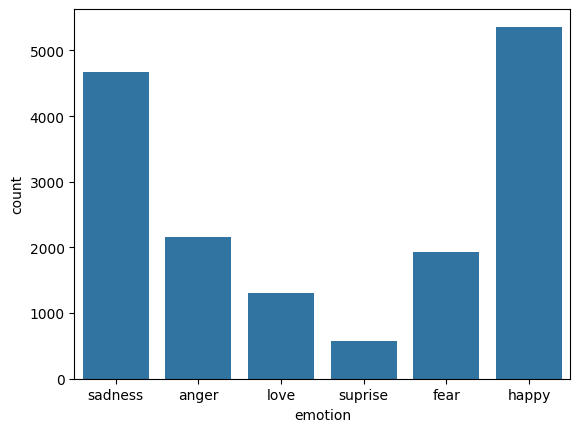

In [9]:
sns.countplot(data,x=data.emotion);

In [10]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data.text)
sequences = tokenizer.texts_to_sequences(data.text)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences)
sequences[3]

[1, 23, 164, 7, 664, 26, 5, 4157, 1, 58, 46, 8, 12, 21, 71, 29, 5, 3496]

In [11]:
padded_sequences[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,   23,  164,    7,  664,   26,    5,
       4157,    1,   58,   46,    8,   12,   21,   71,   29,    5, 3496],
      dtype=int32)

In [12]:
rnn = Sequential([Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = padded_sequences.shape[1] , input_length = padded_sequences.shape[1]),
                  LSTM(50 , activation = 'tanh'),
                  Dense(50 , activation = 'relu'),
                  Dense(len(data['emotion'].unique()) , activation = 'softmax')])


c:\Users\Owner\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
rnn.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
listed_label = list(data['label'])
label = to_categorical(listed_label)

In [16]:
rnn.fit(padded_sequences,label,epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4150 - loss: 1.4909
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8549 - loss: 0.4159
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9539 - loss: 0.1405
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9771 - loss: 0.0697
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9813 - loss: 0.0560
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9858 - loss: 0.0433
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9892 - loss: 0.0344
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9908 - loss: 0.0277
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9904 - loss: 0.0273
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9911 - loss: 0.0302


In [68]:
user_input = "there a lot of people and feeling good"
sequences = tokenizer.texts_to_sequences([user_input])
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=66)

In [69]:
padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  80,   6, 158,   9,  62,   3,   7,
        101]], dtype=int32)

In [79]:
emotions = ['sadness','happy','love','anger','fear','suprise']
prediction = np.argmax(rnn.predict(padded))
emotions[prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'happy'

In [80]:
import  warnings
warnings.filterwarnings('ignore')

In [81]:
rnn.save('model.h5')

In [78]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)